# DSBDL Assignment 02 - Data Wrangling 2

Create an “Academic performance” dataset of students and perform the following operations using Python.

1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

Dataset details: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
ds = pd.read_csv( '/content/drive/My Drive/DSBDL/Assignment2/student_perfomance.csv' )
ds.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
ds.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
ds = ds.rename( columns={
    "race/ethnicity": "race",
    "parental level of education": "parent_edu_level" ,
    "test preparation course": "course" ,
    "math score": "math_score" ,
    "reading score": "reading_score" ,
    "writing score": "writing_score"
} )
ds.head()



,gender,race,parent_edu_level,lunch,course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: xlabel='math_score', ylabel='Count'>

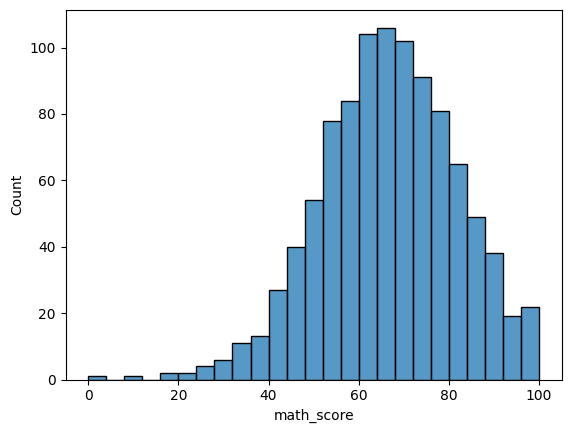

In [6]:
sns.histplot(ds.math_score)

<Axes: xlabel='reading_score', ylabel='Count'>

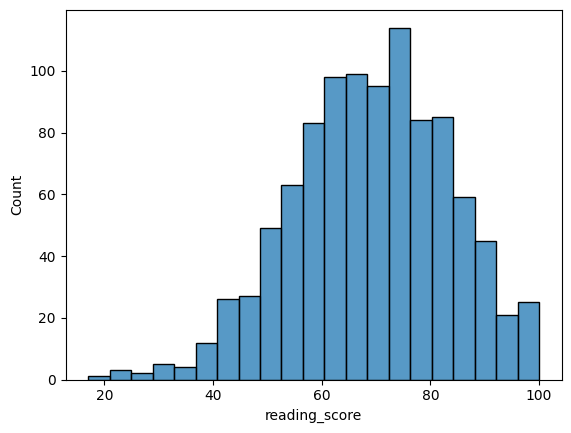

In [7]:
sns.histplot(ds.reading_score)

<Axes: xlabel='writing_score', ylabel='Count'>

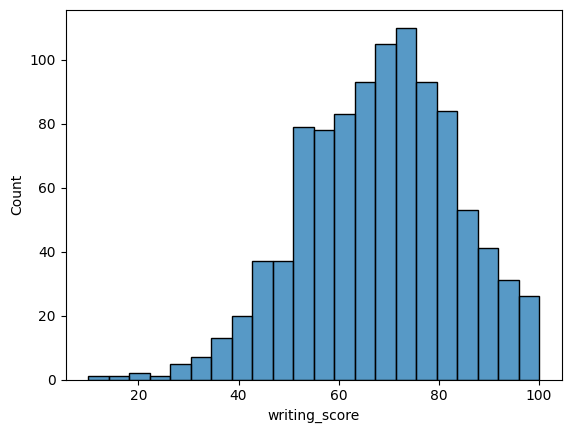

In [8]:
sns.histplot(ds.writing_score)

In [9]:
def outliers_removal(col_name: str):
  global ds
  q3, q1 = np.percentile(ds[col_name], [75, 25])
  iqr = q3 - q1
  ds = ds[(ds[col_name] >= q1 - 1.5*iqr) & (ds[col_name] <= q3 + 1.5*iqr)]

outliers_removal('math_score')
outliers_removal('reading_score')
outliers_removal('writing_score')


<Axes: xlabel='math_score', ylabel='Count'>

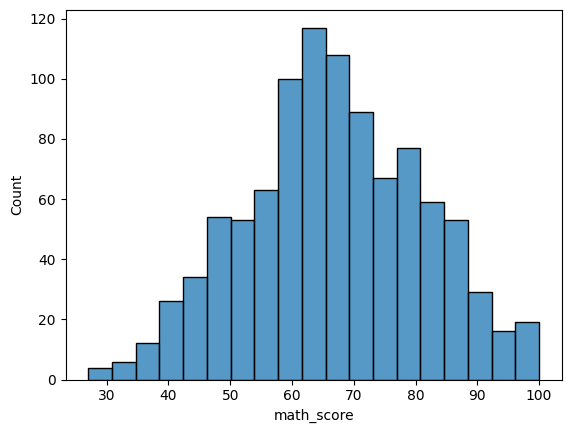

In [10]:
sns.histplot(ds.math_score)

<Axes: xlabel='reading_score', ylabel='Count'>

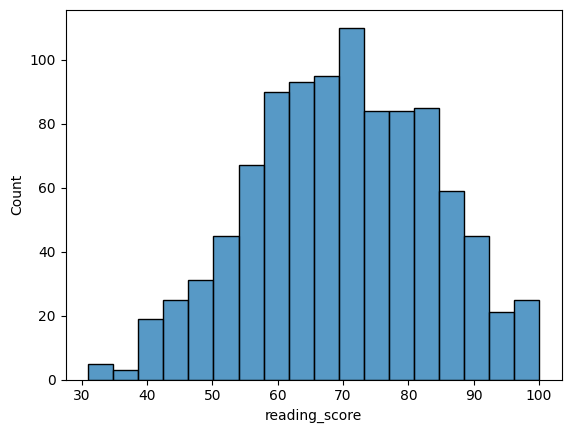

In [11]:
sns.histplot(ds.reading_score)

<Axes: xlabel='writing_score', ylabel='Count'>

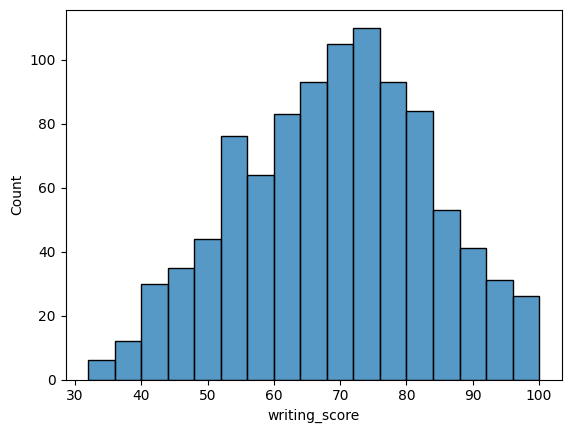

In [12]:
sns.histplot(ds.writing_score)

# Done!